# MNIST using K-Means Clustering

In [6]:
import numpy as np

In [7]:
from sklearn.datasets import load_digits
digits = load_digits()

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target,test_size=0.20, random_state=0)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train,test_size=0.20, random_state=0)

In [9]:
def kmeansinitcentroids(X,k):
    centroids = X
    np.random.seed(8)
    np.random.shuffle(centroids)
    return centroids[:k,:]

In [10]:
def eucledian_distance(v1,v2):
    
    distance = 0
    
    for i in range (len(v1)):
        distance = distance + (v1[i]-v2[i])**2
        
    return np.sqrt(distance)

In [11]:
def findclosestcentroids(x,centroids,k):
    
    index = []
    
    for i in range(len(x)):
        temp = []
        for j in range(len(centroids)):
            dist = eucledian_distance(x[i],centroids[j])
            temp.append(dist)
        index.append(np.argmax(temp))
    
    return index   

In [12]:
def computeCentroidnotmean(x,index,k,prevcentroid):
    centroids = []

    for i in range(k):
        temp = []
        for j in range(len(index)):
            if(index[j] == i):
                temp.append(x[j])
        dist = []
        for q in range(len(temp)):
            d = eucledian_distance(temp[q],prevcentroid[i])
            dist.append(d)
        n = np.argmin(temp)
        y = x[n]    
        centroids.append(y)

    return centroids        

In [21]:
def computeCentroid(x,index,k,prevcentroid):
    centroids = []

    for i in range(k):
        temp = []
        for j in range(len(index)):
            if(index[j] == i):
                temp.append(x[j])
            
        y = np.mean(temp,axis = 0)
        print(y.shape)
        centroids.append(y)

    return centroids  

In [14]:
l  = [[1,2],[2,3]]
import numpy as np
np.mean(l,axis=0)

array([1.5, 2.5])

In [23]:
k = 5
it = 100

centroid = kmeansinitcentroids(x_train,k)

for i in range(0,it):
    print(i)
    idx = findclosestcentroids(x_train,centroid,k) 
    prevcentroid = centroid
    centroid = computeCentroid(x_train,idx,k,prevcentroid)
    

0
(64,)
(64,)
(64,)
(64,)
(64,)
1
(64,)
(64,)
(64,)
(64,)
(64,)
2
(64,)
(64,)
(64,)
(64,)
(64,)
3
(64,)
(64,)
(64,)
(64,)
(64,)
4
(64,)
(64,)
(64,)
(64,)
(64,)
5
(64,)
(64,)
(64,)
(64,)
(64,)
6
(64,)
(64,)
(64,)
(64,)
(64,)
7
(64,)
(64,)
(64,)
(64,)
(64,)
8
(64,)
(64,)
(64,)
(64,)
()
9


/Users/ritikmalhotra/miniconda3/envs/av/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ritikmalhotra/miniconda3/envs/av/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


IndexError: invalid index to scalar variable.

In [ ]:
def predict(x,centroid):
    
    cluster = []
    
    for i in range(len(x)):
        distance = []
        for j in range(len(centroid)):
            dist = eucledian_distance(x[i],centroid[j])
            distance.append(dist)
        cluster.append(np.argmin(distance))
        
    return cluster

[array([0.00000000e+00, 2.78169014e-01, 6.65845070e+00, 1.29542254e+01,
        1.24049296e+01, 6.20422535e+00, 7.81690141e-01, 0.00000000e+00,
        0.00000000e+00, 2.67605634e+00, 1.36232394e+01, 1.00915493e+01,
        9.92957746e+00, 1.13556338e+01, 1.46830986e+00, 7.04225352e-03,
        0.00000000e+00, 4.08098592e+00, 1.13908451e+01, 3.53169014e+00,
        6.01760563e+00, 1.09225352e+01, 2.26056338e+00, 0.00000000e+00,
        0.00000000e+00, 3.32042254e+00, 9.13028169e+00, 6.98943662e+00,
        8.69366197e+00, 1.01408451e+01, 3.53873239e+00, 0.00000000e+00,
        0.00000000e+00, 2.31338028e+00, 4.93661972e+00, 2.82042254e+00,
        4.51408451e+00, 1.11478873e+01, 5.35211268e+00, 0.00000000e+00,
        0.00000000e+00, 1.52112676e+00, 5.07746479e+00, 5.38732394e-01,
        1.35915493e+00, 1.08591549e+01, 6.55281690e+00, 0.00000000e+00,
        0.00000000e+00, 1.02464789e+00, 1.01126761e+01, 6.63028169e+00,
        7.18309859e+00, 1.25774648e+01, 4.82394366e+00, 4.225352

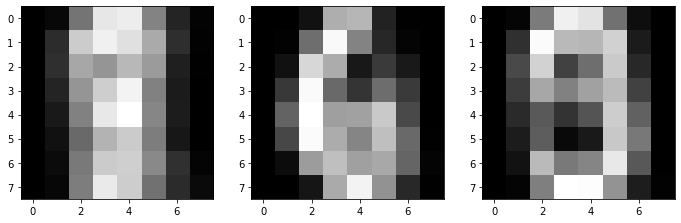

In [39]:

import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index,(image) in enumerate(zip(centroid[0:3])):
    plt.subplot(1,5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
